In [539]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



In [540]:
with open('../sf_vs_nyc_house_data.csv', 'r') as f:
    labels = f.readline()

print(labels)

full_data = np.genfromtxt('../sf_vs_nyc_house_data.csv', delimiter=',')[1:]
full_data.shape

in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation



(492, 8)

In [541]:
# Sample data
X = torch.tensor(full_data[::2,1:], dtype=torch.float32)  # 12 samples, each with 7 features

X= torch.nn.functional.normalize(X, dim=0)

y = torch.squeeze(torch.tensor(full_data[::2,:1], dtype=torch.float32)) # Ensure y is 1-dimensional
torch.bincount(y.to(torch.int64))

tensor([112, 134])

In [542]:
# Define the model
class MLP_Large_Adam(nn.Module):
    def __init__(self):
        super(MLP_Large_Adam, self).__init__()
        self.l0 = nn.Linear(7, 1000)  # Increase the number of neurons
        self.relu0 = nn.ReLU()
        self.l1 = nn.Linear(1000, 500)  # Increase the number of neurons
        self.relu1 = nn.ReLU()
        self.l2 = nn.Linear(500, 100)  # Increase the number of neurons
        self.relu2 = nn.ReLU()
        self.l3 = nn.Linear(100, 50)  # Increase the number of neurons
        self.relu3 = nn.ReLU()
        self.l4 = nn.Linear(50, 1)
        self.out = nn.Sigmoid()

    def forward(self, X):
        x = self.l0(X)
        x = self.relu0(x)
        x = self.l1(x)
        x = self.relu1(x)
        x = self.l2(x)
        x = self.relu2(x)
        x = self.l3(x)
        x = self.relu3(x)
        x = self.l4(x)
        x = self.out(x)
        return x

# Initialize the model
model_l_a = MLP_Large_Adam()
criterion = nn.BCELoss()
optimizer = optim.Adam(params=model_l_a.parameters(), lr=0.001)  # Adjusted learning rate




100%|██████████| 1000/1000 [00:03<00:00, 279.49it/s]


tensor([2.4962e-01, 2.1200e-02, 1.5746e-02, 1.3551e-02, 9.1716e-02, 9.8592e-03,
        4.6242e-02, 3.6405e-03, 2.8693e-02, 7.2267e-02, 3.4806e-02, 6.3395e-05,
        7.3356e-02, 1.8440e-02, 3.6820e-01, 1.6051e-01, 6.0075e-04, 5.9877e-04,
        3.4421e-01, 3.8795e-02, 2.2138e-03, 2.0912e-03, 5.8675e-03, 2.9978e-02,
        4.5948e-04, 1.7759e-04, 3.0832e-02, 2.2514e-03, 2.7625e-02, 2.9778e-03,
        2.0921e-03, 7.2196e-01, 2.0947e-03, 1.5008e-01, 1.5968e-01, 1.5672e-03,
        9.8807e-03, 1.8421e-01, 2.5383e-01, 1.7500e-03, 1.9392e-03, 2.2950e-03,
        4.4799e-03, 9.6555e-02, 1.8606e-02, 7.4580e-03, 2.3305e-01, 2.0798e-03,
        1.1751e-02, 1.2858e-02, 1.3782e-02, 3.1628e-02, 4.4521e-02, 5.5231e-02,
        2.2746e-05, 4.5035e-03, 3.1318e-02, 1.3686e-03, 8.0113e-04, 1.6127e-04,
        2.0741e-05, 1.9535e-02, 7.9678e-03, 2.0548e-04, 1.4687e-03, 1.1716e-03,
        5.3131e-04, 1.5944e-04, 6.2334e-05, 1.4635e-03, 1.2290e-03, 2.9703e-04,
        8.3282e-04, 1.5162e-03, 1.1722e-

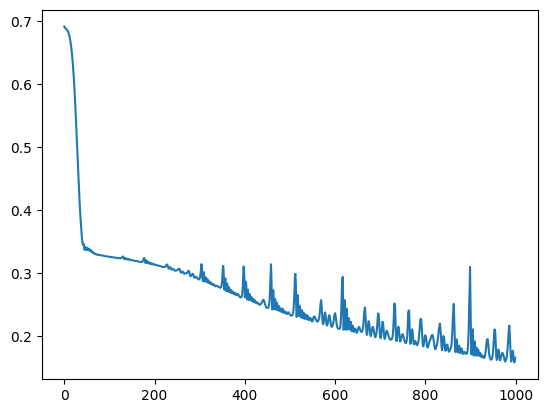

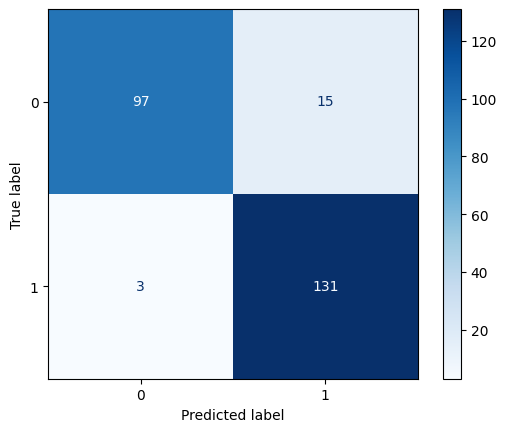

In [543]:
# Training loop
epochs = 1000
lossi = []
for epoch in tqdm(range(epochs)):
    optimizer.zero_grad()
    output = model_l_a(X).squeeze()
    loss = criterion(output, y)
    lossi.append(loss.item())
    loss.backward()
    optimizer.step()

    # if (epoch + 1) % 100 == 0:
    #     print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluation on training data to check overfitting
plt.plot(lossi)

model_l_a.eval()
with torch.no_grad():
    predictions = model_l_a(X).squeeze()
    print(predictions)
    predictions = (predictions >= 0.2).float()  # Convert probabilities to binary predictions
    accuracy = (predictions == y).float().mean()
    print(f'Accuracy on training data: {accuracy:.4f}')

cm = confusion_matrix(y.numpy(), predictions.numpy())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.show()